## Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import tqdm
from tqdm import tqdm
import time
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import collections

plt.style.use('seaborn-v0_8-deep')

pd.set_option('future.no_silent_downcasting', True)

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Data Preprocessing

### Required Functions

In [3]:
def preprocess(df):
    df['CITY 1'] = df['CITY 1'].str.upper();
    df['CITY 2'] = df['CITY 2'].str.upper();
    df['CITY 1'] = df['CITY 1'].str.strip();
    df['CITY 1'] = df['CITY 1'].str.rstrip();
    df['CITY 2'] = df['CITY 2'].str.strip();
    df['CITY 2'] = df['CITY 2'].str.rstrip();
    df.replace('-', 0, inplace=True);
    df.replace('DEOGHAR AIRPORT', 'DEOGHAR', inplace=True);
    df.replace('HOLLONGI AIRPORT, ITANAGAR', 'ITANAGAR', inplace=True);
    df.replace('KUSHINAGAR', 'KUSHINAGAR INTERNATIONAL AIRPORT', inplace=True);
    df.replace('BIDAR AIRPORT, KARN', 'BIDAR AIRPORT, KARNATAKA', inplace=True);
    df.replace('KALABURAGI, KARNAT', 'KALABURAGI, KARNATAKA', inplace=True);
    df.replace('Itanagar', 'ITANAGAR', inplace=True);
    df.replace('PUDUCHERRY', 'PONDICHERRY', inplace=True);
    df['PASSENGERS FROM CITY 2'] = df['PASSENGERS FROM CITY 2'].astype(int);
    df['PASSENGERS TO CITY 2'] = df['PASSENGERS TO CITY 2'].astype(int);
    
    return None

In [4]:
def graphi_format(df) -> pd.DataFrame:
    df1 = df.copy()
    df2 = df1.copy()
    
    df1.drop(columns=['PASSENGERS FROM CITY 2'], inplace=True)
    df2['CITY 1'], df2['CITY 2'] = df2['CITY 2'], df2['CITY 1']
    
    df2.drop(columns=['PASSENGERS TO CITY 2'], inplace=True)
    df2.rename(columns={'PASSENGERS FROM CITY 2': 'PASSENGERS TO CITY 2'}, inplace=True)
    
    return  pd.concat([df1, df2], ignore_index=True)

### 2023

In [5]:
jan2023_data = pd.read_excel('IndianAirways2023/JAN2023.xlsx')
feb2023_data = pd.read_excel('IndianAirways2023/FEB2023.xlsx')
mar2023_data = pd.read_excel('IndianAirways2023/MAR2023.xlsx')
apr2023_data = pd.read_excel('IndianAirways2023/APR2023.xlsx')
may2023_data = pd.read_excel('IndianAirways2023/MAY2023.xlsx')
jun2023_data = pd.read_excel('IndianAirways2023/JUN2023.xlsx')
jul2023_data = pd.read_excel('IndianAirways2023/JUL2023.xlsx')
aug2023_data = pd.read_excel('IndianAirways2023/AUG2023.xlsx')
sep2023_data = pd.read_excel('IndianAirways2023/SEP2023.xlsx')
oct2023_data = pd.read_excel('IndianAirways2023/OCT2023.xlsx')
nov2023_data = pd.read_excel('IndianAirways2023/NOV2023.xlsx')
dec2023_data = pd.read_excel('IndianAirways2023/DEC2023.xlsx')

year2023_data = [jan2023_data, feb2023_data, mar2023_data, apr2023_data, may2023_data, jun2023_data, jul2023_data, aug2023_data, sep2023_data, oct2023_data, nov2023_data, dec2023_data]
for data in year2023_data:
    preprocess(data)

combined2023_data = pd.concat([data for data in year2023_data])
combined2023_data = combined2023_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
year2023_data.append(combined2023_data)

year2023_data_graphi_format = [graphi_format(data) for data in year2023_data]

### 2022

In [6]:
jan2022_data = pd.read_excel('IndianAirways2022/JAN2022.xlsx')
feb2022_data = pd.read_excel('IndianAirways2022/FEB2022.xlsx')
mar2022_data = pd.read_excel('IndianAirways2022/MAR2022.xlsx')
apr2022_data = pd.read_excel('IndianAirways2022/APR2022.xlsx')
may2022_data = pd.read_excel('IndianAirways2022/MAY2022.xlsx')
jun2022_data = pd.read_excel('IndianAirways2022/JUN2022.xlsx')
jul2022_data = pd.read_excel('IndianAirways2022/JUL2022.xlsx')
aug2022_data = pd.read_excel('IndianAirways2022/AUG2022.xlsx')
sep2022_data = pd.read_excel('IndianAirways2022/SEP2022.xlsx')
oct2022_data = pd.read_excel('IndianAirways2022/OCT2022.xlsx')
nov2022_data = pd.read_excel('IndianAirways2022/NOV2022.xlsx')
dec2022_data = pd.read_excel('IndianAirways2022/DEC2022.xlsx')

year2022_data = [jan2022_data, feb2022_data, mar2022_data, apr2022_data, may2022_data, jun2022_data, jul2022_data, aug2022_data, sep2022_data, oct2022_data, nov2022_data, dec2022_data]
for data in year2022_data:
    preprocess(data)
    
combined2022_data = pd.concat([data for data in year2022_data])
combined2022_data = combined2022_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
year2022_data.append(combined2022_data)

year2022_data_graphi_format = [graphi_format(data) for data in year2022_data]

### 2021

In [7]:
jan2021_data = pd.read_excel('IndianAirways2021/JAN2021.xlsx')
feb2021_data = pd.read_excel('IndianAirways2021/FEB2021.xlsx')
mar2021_data = pd.read_excel('IndianAirways2021/MAR2021.xlsx')
apr2021_data = pd.read_excel('IndianAirways2021/APR2021.xlsx')
may2021_data = pd.read_excel('IndianAirways2021/MAY2021.xlsx')
jun2021_data = pd.read_excel('IndianAirways2021/JUN2021.xlsx')
jul2021_data = pd.read_excel('IndianAirways2021/JUL2021.xlsx')
aug2021_data = pd.read_excel('IndianAirways2021/AUG2021.xlsx')
sep2021_data = pd.read_excel('IndianAirways2021/SEP2021.xlsx')
oct2021_data = pd.read_excel('IndianAirways2021/OCT2021.xlsx')
nov2021_data = pd.read_excel('IndianAirways2021/NOV2021.xlsx')
dec2021_data = pd.read_excel('IndianAirways2021/DEC2021.xlsx')

year2021_data = [jan2021_data, feb2021_data, mar2021_data, apr2021_data, may2021_data, jun2021_data, jul2021_data, aug2021_data, sep2021_data, oct2021_data, nov2021_data, dec2021_data]
for data in year2021_data:
    preprocess(data)
    
combined2021_data = pd.concat([data for data in year2021_data])
combined2021_data = combined2021_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
year2021_data.append(combined2021_data)

year2021_data_graphi_format = [graphi_format(data) for data in year2021_data]

### 2020

In [8]:
jan2020_data = pd.read_excel('IndianAirways2020/JAN2020.xlsx')
feb2020_data = pd.read_excel('IndianAirways2020/FEB2020.xlsx')
mar2020_data = pd.read_excel('IndianAirways2020/MAR2020.xlsx')
apr2020_data = pd.read_excel('IndianAirways2020/APR2020.xlsx')
may2020_data = pd.read_excel('IndianAirways2020/MAY2020.xlsx')
jun2020_data = pd.read_excel('IndianAirways2020/JUN2020.xlsx')
jul2020_data = pd.read_excel('IndianAirways2020/JUL2020.xlsx')
aug2020_data = pd.read_excel('IndianAirways2020/AUG2020.xlsx')
sep2020_data = pd.read_excel('IndianAirways2020/SEP2020.xlsx')
oct2020_data = pd.read_excel('IndianAirways2020/OCT2020.xlsx')
nov2020_data = pd.read_excel('IndianAirways2020/NOV2020.xlsx')
dec2020_data = pd.read_excel('IndianAirways2020/DEC2020.xlsx')

year2020_data = [jan2020_data, feb2020_data, mar2020_data, apr2020_data, may2020_data, jun2020_data, jul2020_data, aug2020_data, sep2020_data, oct2020_data, nov2020_data, dec2020_data]
for data in year2020_data:
    preprocess(data)
    
combined2020_data = pd.concat([data for data in year2020_data])
combined2020_data = combined2020_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
year2020_data.append(combined2020_data)

year2020_data_graphi_format = [graphi_format(data) for data in year2020_data]

### 2019

In [9]:
jan2019_data = pd.read_excel('IndianAirways2019/JAN2019.xlsx')
feb2019_data = pd.read_excel('IndianAirways2019/FEB2019.xlsx')
mar2019_data = pd.read_excel('IndianAirways2019/MAR2019.xlsx')
apr2019_data = pd.read_excel('IndianAirways2019/APR2019.xlsx')
may2019_data = pd.read_excel('IndianAirways2019/MAY2019.xlsx')
jun2019_data = pd.read_excel('IndianAirways2019/JUN2019.xlsx')
jul2019_data = pd.read_excel('IndianAirways2019/JUL2019.xlsx')
aug2019_data = pd.read_excel('IndianAirways2019/AUG2019.xlsx')
sep2019_data = pd.read_excel('IndianAirways2019/SEP2019.xlsx')
oct2019_data = pd.read_excel('IndianAirways2019/OCT2019.xlsx')
nov2019_data = pd.read_excel('IndianAirways2019/NOV2019.xlsx')
dec2019_data = pd.read_excel('IndianAirways2019/DEC2019.xlsx')

year2019_data = [jan2019_data, feb2019_data, mar2019_data, apr2019_data, may2019_data, jun2019_data, jul2019_data, aug2019_data, sep2019_data, oct2019_data, nov2019_data, dec2019_data]
for data in year2019_data:
    preprocess(data)
    
combined2019_data = pd.concat([data for data in year2019_data])
combined2019_data = combined2019_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
year2019_data.append(combined2019_data)

year2019_data_graphi_format = [graphi_format(data) for data in year2019_data]

### 2018

In [10]:
jan2018_data = pd.read_excel('IndianAirways2018/JAN2018.xlsx')
feb2018_data = pd.read_excel('IndianAirways2018/FEB2018.xlsx')
mar2018_data = pd.read_excel('IndianAirways2018/MAR2018.xlsx')
apr2018_data = pd.read_excel('IndianAirways2018/APR2018.xlsx')
may2018_data = pd.read_excel('IndianAirways2018/MAY2018.xlsx')
jun2018_data = pd.read_excel('IndianAirways2018/JUN2018.xlsx')
jul2018_data = pd.read_excel('IndianAirways2018/JUL2018.xlsx')
aug2018_data = pd.read_excel('IndianAirways2018/AUG2018.xlsx')
sep2018_data = pd.read_excel('IndianAirways2018/SEP2018.xlsx')
oct2018_data = pd.read_excel('IndianAirways2018/OCT2018.xlsx')
nov2018_data = pd.read_excel('IndianAirways2018/NOV2018.xlsx')
dec2018_data = pd.read_excel('IndianAirways2018/DEC2018.xlsx')

year2018_data = [jan2018_data, feb2018_data, mar2018_data, apr2018_data, may2018_data, jun2018_data, jul2018_data, aug2018_data, sep2018_data, oct2018_data, nov2018_data, dec2018_data]
for data in year2018_data:
    preprocess(data)
    
combined2018_data = pd.concat([data for data in year2018_data])
combined2018_data = combined2018_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
year2018_data.append(combined2018_data)

year2018_data_graphi_format = [graphi_format(data) for data in year2018_data]

### 2017

In [11]:
jan2017_data = pd.read_excel('IndianAirways2017/JAN2017.xlsx')
feb2017_data = pd.read_excel('IndianAirways2017/FEB2017.xlsx')
mar2017_data = pd.read_excel('IndianAirways2017/MAR2017.xlsx')
apr2017_data = pd.read_excel('IndianAirways2017/APR2017.xlsx')
may2017_data = pd.read_excel('IndianAirways2017/MAY2017.xlsx')
jun2017_data = pd.read_excel('IndianAirways2017/JUN2017.xlsx')
jul2017_data = pd.read_excel('IndianAirways2017/JUL2017.xlsx')
aug2017_data = pd.read_excel('IndianAirways2017/AUG2017.xlsx')
sep2017_data = pd.read_excel('IndianAirways2017/SEP2017.xlsx')
oct2017_data = pd.read_excel('IndianAirways2017/OCT2017.xlsx')
nov2017_data = pd.read_excel('IndianAirways2017/NOV2017.xlsx')
dec2017_data = pd.read_excel('IndianAirways2017/DEC2017.xlsx')

year2017_data = [jan2017_data, feb2017_data, mar2017_data, apr2017_data, may2017_data, jun2017_data, jul2017_data, aug2017_data, sep2017_data, oct2017_data, nov2017_data, dec2017_data]
for data in year2017_data:
    preprocess(data)
    
combined2017_data = pd.concat([data for data in year2017_data])
combined2017_data = combined2017_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
year2017_data.append(combined2017_data)

year2017_data_graphi_format = [graphi_format(data) for data in year2017_data]

### 2016

In [12]:
jan2016_data = pd.read_excel('IndianAirways2016/JAN2016.xlsx')
feb2016_data = pd.read_excel('IndianAirways2016/FEB2016.xlsx')
mar2016_data = pd.read_excel('IndianAirways2016/MAR2016.xlsx')
apr2016_data = pd.read_excel('IndianAirways2016/APR2016.xlsx')
may2016_data = pd.read_excel('IndianAirways2016/MAY2016.xlsx')
jun2016_data = pd.read_excel('IndianAirways2016/JUN2016.xlsx')
jul2016_data = pd.read_excel('IndianAirways2016/JUL2016.xlsx')
aug2016_data = pd.read_excel('IndianAirways2016/AUG2016.xlsx')
sep2016_data = pd.read_excel('IndianAirways2016/SEP2016.xlsx')
oct2016_data = pd.read_excel('IndianAirways2016/OCT2016.xlsx')
nov2016_data = pd.read_excel('IndianAirways2016/NOV2016.xlsx')
dec2016_data = pd.read_excel('IndianAirways2016/DEC2016.xlsx')

year2016_data = [jan2016_data, feb2016_data, mar2016_data, apr2016_data, may2016_data, jun2016_data, jul2016_data, aug2016_data, sep2016_data, oct2016_data, nov2016_data, dec2016_data]
for data in year2016_data:
    preprocess(data)
    
combined2016_data = pd.concat([data for data in year2016_data])
combined2016_data = combined2016_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
year2016_data.append(combined2016_data)

year2016_data_graphi_format = [graphi_format(data) for data in year2016_data]

### 2015

In [13]:
apr2015_data = pd.read_excel('IndianAirways2015/APR2015.xlsx')
may2015_data = pd.read_excel('IndianAirways2015/MAY2015.xlsx')
jun2015_data = pd.read_excel('IndianAirways2015/JUN2015.xlsx')
jul2015_data = pd.read_excel('IndianAirways2015/JUL2015.xlsx')
aug2015_data = pd.read_excel('IndianAirways2015/AUG2015.xlsx')
sep2015_data = pd.read_excel('IndianAirways2015/SEP2015.xlsx')
oct2015_data = pd.read_excel('IndianAirways2015/OCT2015.xlsx')
nov2015_data = pd.read_excel('IndianAirways2015/NOV2015.xlsx')
dec2015_data = pd.read_excel('IndianAirways2015/DEC2015.xlsx')

year2015_data = [apr2015_data, may2015_data, jun2015_data, jul2015_data, aug2015_data, sep2015_data, oct2015_data, nov2015_data, dec2015_data]
for data in year2015_data:
    preprocess(data)
    
combined2015_data = pd.concat([data for data in year2015_data])
combined2015_data = combined2015_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
year2015_data.append(combined2015_data)

year2015_data_graphi_format = [graphi_format(data) for data in year2015_data]

### Assigning IDs, Latitude, and Longitude to the cities, and GeoPandas Geometry

In [14]:
data_for_ID = pd.concat([year2023_data_graphi_format[-1], year2022_data_graphi_format[-1], year2021_data_graphi_format[-1], year2020_data_graphi_format[-1], year2019_data_graphi_format[-1], year2018_data_graphi_format[-1], year2017_data_graphi_format[-1], year2016_data_graphi_format[-1], year2015_data_graphi_format[-1]])
data_for_ID = data_for_ID.groupby(['CITY 1', 'CITY 2']).sum().reset_index()

unique_places = data_for_ID['CITY 1'].unique()
place_to_ID_dict = {place: ID for ID, place in enumerate(unique_places)}
ID_to_place_dict = {ID: place for place, ID in place_to_ID_dict.items()}

# place_to_ID_dict, ID_to_place_dict

In [15]:
# region
places_coordinates = {'AGARTALA': (23.8315, 91.2868), 'AGATTI ISLAND': (10.8231, 72.1768), 'AGRA': (27.1767, 78.0081), 'AHMEDABAD': (23.0225, 72.5714), 'AIZAWL': (23.7271, 92.7176), 'KISHANGARH': (26.5758, 74.8402), 'ALLAHABAD': (25.4358, 81.8463), 'AMRITSAR': (31.7055, 74.8023), 'AURANGABAD': (19.8762, 75.3433), 'BAGDOGRA': (26.6831, 88.3285), 'BAREILLY': (28.367, 79.4304), 'BELGAUM': (15.862, 74.5085), 'BENGALURU': (12.9716, 77.5946), 'BHAVNAGAR': (21.7645, 72.1519), 'BHOPAL': (23.2599, 77.4126), 'BHUBANESWAR': (20.2961, 85.8245), 'BHUJ': (23.2531, 69.6693), 'BIKANER': (28.0229, 73.3119), 'BILASPUR': (22.0807, 82.15), 'MUMBAI': (19.076, 72.8777), 'CHANDIGARH': (30.7333, 76.7794), 'CHENNAI': (13.0827, 80.2707), 'KOCHI': (9.9312, 76.2673), 'COIMBATORE': (11.0168, 76.9558), 'DABOLIM': (15.3801, 73.8341), 'DARBHANGA': (26.1522, 85.896), 'DEHRADUN': (30.3165, 78.0322), 'DELHI': (28.6139, 77.209), 'DEOGHAR': (24.482, 86.6956), 'DHARAMSALA': (32.219, 76.3234), 'DIBRUGARH': (27.4728, 94.9119), 'DIMAPUR': (25.7951, 93.9501), 'DURGAPUR': (23.5505, 87.2885), 'GAYA': (24.7964, 85.0077), 'GHAZIABAD': (28.6692, 77.4538), 'GORAKHPUR': (26.7606, 83.3732), 'GUWAHATI': (26.1445, 91.7362), 'GWALIOR': (26.2183, 78.1828), 'HUBLI': (15.3647, 75.1239), 'HYDERABAD': (17.385, 78.4867), 'IMPHAL': (24.817, 93.9368), 'INDORE': (22.7196, 75.8577), 'JABALPUR': (23.1815, 79.9864), 'JAGDALPUR': (19.0822, 82.0212), 'JAIPUR': (26.9124, 75.7873), 'JAMMU': (32.7266, 74.857), 'JAMSHEDPUR': (22.8056, 86.1711), 'JEYPORE': (18.8564, 82.5644), 'JHARSUGUDA': (21.868, 84.0222), 'JODHPUR': (26.2389, 73.0243), 'JORHAT': (26.7465, 94.202), 'CUDDAPAH': (14.4786, 78.8236), 'KALABURAGI': (17.3297, 76.8372), 'KANNUR': (11.8745, 75.3704), 'KOLHAPUR': (16.705, 74.2433), 'KOLKATA': (22.5726, 88.3639), 'KULLU': (31.9566, 77.1095), 'KURNOOL': (15.8281, 78.0373), 'LEH': (34.1526, 77.5771), 'LILABARI': (27.2955, 94.0977), 'LUCKNOW': (26.8467, 80.9462), 'MADURAI': (9.9252, 78.1198), 'MANGALORE': (12.9141, 74.856), 'NAGPUR': (21.1458, 79.0882), 'PASIGHAT': (28.0665, 95.3269), 'PATNA': (25.5941, 85.1376), 'PORT BLAIR': (11.6234, 92.7265), 'PUNE': (18.5204, 73.8567), 'RAIPUR': (21.2514, 81.6296), 'RAJAHMUNDRY': (17.6868, 83.2185), 'RANCHI': (23.3441, 85.3096), 'SHILLONG': (25.5788, 91.8933), 'SHIRDI': (19.7515, 74.4773), 'SRINAGAR': (34.0837, 74.7973), 'TIRUPATI': (13.6288, 79.4192), 'VARANASI': (25.3176, 82.9739), 'VIJAYAWADA': (16.5062, 80.648), 'GOA': (15.2993, 74.124), 'AJMER': (26.4499, 74.6399), 'COOCH BEHAR': (26.3254, 89.4414), 'DEHRA DUN': (30.3165, 78.0322), 'ITANAGAR': (27.0978, 93.6237), 'KADAPA': (14.4674, 78.8242), 'MOPA, GOA': (15.3888, 73.8335), 'Mopa, Goa': (15.3888, 73.8335), 'DIU': (20.7141, 70.9822), 'SURAT': (21.1702, 72.8311), 'KANPUR': (26.4499, 80.3319), 'RAJKOT': (22.3039, 70.8022), 'SHIVAMOGGA AIRPORT': (13.3986, 74.7421), 'BHATINDA': (30.1709, 74.9153), 'RAJKOT INTERNATIONAL AIRPORT': (22.3039, 70.8022), 'ADAMPUR': (31.4332, 75.758), 'KHAJURAHO': (24.817, 79.9342), 'UTKELA': (20.1463, 83.1822), 'JAISALMER': (26.9155, 70.9083), 'JAMNAGAR': (22.4707, 70.0577), 'KANDLA': (23.0046, 70.2167), 'KESHOD': (21.3177, 70.271), 'KOZHIKODE': (11.2588, 75.7804), 'MALVAN': (16.0662, 73.4665), 'GONDIA': (21.4602, 80.192), 'KADAPA': (14.4674, 78.8242), 'VISAKHAPATNAM': (17.6868, 83.2185), 'TRIVANDRUM': (8.5241, 76.9366), 'UDAIPUR': (24.5854, 73.7125), 'VADODARA': (22.3072, 73.1812), 'BIDAR': (17.9133, 77.5301), 'SILCHAR': (24.8278, 92.797), 'TIRUCHIRAPALLY': (10.7905, 78.7047), 'TUTICORIN': (8.7642, 78.1348), 'VIDYANAGAR': (15.389, 75.091), 'NASIK': (19.9975, 73.7898), 'PONDICHERRY': (11.9416, 79.8083), 'SILCHAR': (24.8278, 92.797), 'ROURKELA': (22.2604, 84.8536), 'MYSORE': (12.2958, 76.6394), 'PANTNAGAR': (29.0328, 79.4737), 'SIMLA': (31.1048, 77.1734), 'TEZU': (27.9161, 96.161), 'RUPSI': (26.1511, 89.9652), 'TEZPUR': (26.7095, 92.7917), 'ZIRO': (27.5564, 93.8287), 'SINDHUDURG AIRPORT': (16.2391, 73.649), 'KUSHINAGAR INTERNATIONAL AIRPORT': (26.7401, 83.3706), 'PAKYONG': (27.3325, 88.6159), 'UTTARLAI': (25.8036, 71.4104), 'ZERO AIRPORT': (27.5915, 93.8287), 'LUDHIANA': (30.901, 75.8573), 'SALEM': (11.6643, 78.146), 'AYODHYA INTERNATIONAL AIRPORT': (26.7271, 82.1829), 'JALGAON': (20.9622, 75.6267), 'KALABURAGI, KARNATAKA': (17.3078, 76.9581), 'PORBANDAR': ( 21.6405, 69.6059), 'NANDED': (19.1833, 77.3167), 'PATHANKOT': (32.2336, 75.6344), 'BIDAR AIRPORT, KARNATAKA': (17.9064, 77.4832), 'GONDIA AIRPORT': (21.5261, 80.2903), 'HISSAR': (29.1794, 75.7553), 'MUNDRA': (22.8348, 69.7654), 'PITHORAGARH': (29.5936, 80.2392), 'GANGTOK': (27.3389, 88.6065), 'COCHIN': (9.9312, 76.2673)}
# endregion

In [16]:
for year_data in [year2023_data, year2022_data, year2021_data, year2020_data, year2019_data, year2018_data, year2017_data, year2016_data, year2015_data,year2023_data_graphi_format, year2022_data_graphi_format, year2021_data_graphi_format, year2020_data_graphi_format, year2019_data_graphi_format, year2018_data_graphi_format, year2017_data_graphi_format, year2016_data_graphi_format, year2015_data_graphi_format]:
    for month_data in year_data:
        month_data['CITY 1 ID'] = month_data['CITY 1'].apply(lambda x: place_to_ID_dict[x])
        month_data['CITY 2 ID'] = month_data['CITY 2'].apply(lambda x: place_to_ID_dict[x])
        month_data['LATITUDE 1'] = month_data['CITY 1'].apply(lambda x: places_coordinates[x][0])
        month_data['LONGITUDE 1'] = month_data['CITY 1'].apply(lambda x: places_coordinates[x][1])
        month_data['LATITUDE 2'] = month_data['CITY 2'].apply(lambda x: places_coordinates[x][0])
        month_data['LONGITUDE 2'] = month_data['CITY 2'].apply(lambda x: places_coordinates[x][1])
        geometry1 = [Point(xy) for xy in zip(month_data['LONGITUDE 1'], month_data['LATITUDE 1'])]
        geometry2 = [Point(xy) for xy in zip(month_data['LONGITUDE 2'], month_data['LATITUDE 2'])]
        month_data['GEOMETRY CITY 1'] = geometry1
        month_data['GEOMETRY CITY 2'] = geometry2
        

In [17]:
len(places_coordinates)

141

### Making the Networks

In [18]:
apr2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
combined2015_network = nx.from_pandas_edgelist(year2015_data_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
combined2016_network = nx.from_pandas_edgelist(year2016_data_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
combined2017_network = nx.from_pandas_edgelist(year2017_data_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
combined2018_network = nx.from_pandas_edgelist(year2018_data_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
combined2019_network = nx.from_pandas_edgelist(year2019_data_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
combined2020_network = nx.from_pandas_edgelist(year2020_data_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
combined2021_network = nx.from_pandas_edgelist(year2021_data_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
combined2022_network = nx.from_pandas_edgelist(year2022_data_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
combined2023_network = nx.from_pandas_edgelist(year2023_data_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

## Extra Declarations

In [19]:
month_networks = [jan2016_network, feb2016_network, mar2016_network, apr2016_network, may2016_network, jun2016_network, jul2016_network, aug2016_network, sep2016_network, oct2016_network, nov2016_network, dec2016_network, jan2017_network, feb2017_network, mar2017_network, apr2017_network, may2017_network, jun2017_network, jul2017_network, aug2017_network, sep2017_network, oct2017_network, nov2017_network, dec2017_network, jan2018_network, feb2018_network, mar2018_network, apr2018_network, may2018_network, jun2018_network, jul2018_network, aug2018_network, sep2018_network, oct2018_network, nov2018_network, dec2018_network, jan2019_network, feb2019_network, mar2019_network, apr2019_network, may2019_network, jun2019_network, jul2019_network, aug2019_network, sep2019_network, oct2019_network, nov2019_network, dec2019_network, jan2020_network, feb2020_network, mar2020_network, apr2020_network, may2020_network, jun2020_network, jul2020_network, aug2020_network, sep2020_network, oct2020_network, nov2020_network, dec2020_network, jan2021_network, feb2021_network, mar2021_network, apr2021_network, may2021_network, jun2021_network, jul2021_network, aug2021_network, sep2021_network, oct2021_network, nov2021_network, dec2021_network, jan2022_network, feb2022_network, mar2022_network, apr2022_network, may2022_network, jun2022_network, jul2022_network, aug2022_network, sep2022_network, oct2022_network, nov2022_network, dec2022_network, jan2023_network, feb2023_network, mar2023_network, apr2023_network, may2023_network, jun2023_network, jul2023_network, aug2023_network, sep2023_network, oct2023_network, nov2023_network, dec2023_network]

month_network_names = ["January 2016", "February 2016", "March 2016", "April 2016", "May 2016", "June 2016", "July 2016", "August 2016", "September 2016", "October 2016", "November 2016", "December 2016", "January 2017", "February 2017", "March 2017", "April 2017", "May 2017", "June 2017", "July 2017", "August 2017", "September 2017", "October 2017", "November 2017", "December 2017", "January 2018", "February 2018", "March 2018", "April 2018", "May 2018", "June 2018", "July 2018", "August 2018", "September 2018", "October 2018", "November 2018", "December 2018", "January 2019", "February 2019", "March 2019", "April 2019", "May 2019", "June 2019", "July 2019", "August 2019", "September 2019", "October 2019", "November 2019", "December 2019", "January 2020", "February 2020", "March 2020", "April 2020", "May 2020", "June 2020", "July 2020", "August 2020", "September 2020", "October 2020", "November 2020", "December 2020", "January 2021", "February 2021", "March 2021", "April 2021", "May 2021", "June 2021", "July 2021", "August 2021", "September 2021", "October 2021", "November 2021", "December 2021", "January 2022", "February 2022", "March 2022", "April 2022", "May 2022", "June 2022", "July 2022", "August 2022", "September 2022", "October 2022", "November 2022", "December 2022", "January 2023", "February 2023", "March 2023", "April 2023", "May 2023", "June 2023", "July 2023", "August 2023", "September 2023", "October 2023", "November 2023", "December 2023"]

In [20]:
jan_networks = [jan2016_network, jan2017_network, jan2018_network, jan2019_network, jan2020_network, jan2021_network, jan2022_network, jan2023_network]
feb_networks = [feb2016_network, feb2017_network, feb2018_network, feb2019_network, feb2020_network, feb2021_network, feb2022_network, feb2023_network]
mar_networks = [mar2016_network, mar2017_network, mar2018_network, mar2019_network, mar2020_network, mar2021_network, mar2022_network, mar2023_network]
apr_networks = [apr2016_network, apr2017_network, apr2018_network, apr2019_network, apr2020_network, apr2021_network, apr2022_network, apr2023_network]
may_networks = [may2016_network, may2017_network, may2018_network, may2019_network, may2020_network, may2021_network, may2022_network, may2023_network]
jun_networks = [jun2016_network, jun2017_network, jun2018_network, jun2019_network, jun2020_network, jun2021_network, jun2022_network, jun2023_network]
jul_networks = [jul2016_network, jul2017_network, jul2018_network, jul2019_network, jul2020_network, jul2021_network, jul2022_network, jul2023_network]
aug_networks = [aug2016_network, aug2017_network, aug2018_network, aug2019_network, aug2020_network, aug2021_network, aug2022_network, aug2023_network]
sep_networks = [sep2016_network, sep2017_network, sep2018_network, sep2019_network, sep2020_network, sep2021_network, sep2022_network, sep2023_network]
oct_networks = [oct2016_network, oct2017_network, oct2018_network, oct2019_network, oct2020_network, oct2021_network, oct2022_network, oct2023_network]
nov_networks = [nov2016_network, nov2017_network, nov2018_network, nov2019_network, nov2020_network, nov2021_network, nov2022_network, nov2023_network]
dec_networks = [dec2016_network, dec2017_network, dec2018_network, dec2019_network, dec2020_network, dec2021_network, dec2022_network, dec2023_network]
combined_networks = [combined2016_network, combined2017_network, combined2018_network, combined2019_network, combined2020_network, combined2021_network, combined2022_network, combined2023_network]

year2015_networks = [apr2015_network, may2015_network, jun2015_network, jul2015_network, aug2015_network, sep2015_network, oct2015_network, nov2015_network, dec2015_network, combined2015_network]
year2016_networks = [jan2016_network, feb2016_network, mar2016_network, apr2016_network, may2016_network, jun2016_network, jul2016_network, aug2016_network, sep2016_network, oct2016_network, nov2016_network, dec2016_network, combined2016_network]
year2017_networks = [jan2017_network, feb2017_network, mar2017_network, apr2017_network, may2017_network, jun2017_network, jul2017_network, aug2017_network, sep2017_network, oct2017_network, nov2017_network, dec2017_network, combined2017_network]
year2018_networks = [jan2018_network, feb2018_network, mar2018_network, apr2018_network, may2018_network, jun2018_network, jul2018_network, aug2018_network, sep2018_network, oct2018_network, nov2018_network, dec2018_network, combined2018_network]
year2019_networks = [jan2019_network, feb2019_network, mar2019_network, apr2019_network, may2019_network, jun2019_network, jul2019_network, aug2019_network, sep2019_network, oct2019_network, nov2019_network, dec2019_network, combined2019_network]
year2020_networks = [jan2020_network, feb2020_network, mar2020_network, apr2020_network, may2020_network, jun2020_network, jul2020_network, aug2020_network, sep2020_network, oct2020_network, nov2020_network, dec2020_network, combined2020_network]
year2021_networks = [jan2021_network, feb2021_network, mar2021_network, apr2021_network, may2021_network, jun2021_network, jul2021_network, aug2021_network, sep2021_network, oct2021_network, nov2021_network, dec2021_network, combined2021_network]
year2022_networks = [jan2022_network, feb2022_network, mar2022_network, apr2022_network, may2022_network, jun2022_network, jul2022_network, aug2022_network, sep2022_network, oct2022_network, nov2022_network, dec2022_network, combined2022_network]
year2023_networks = [jan2023_network, feb2023_network, mar2023_network, apr2023_network, may2023_network, jun2023_network, jul2023_network, aug2023_network, sep2023_network, oct2023_network, nov2023_network, dec2023_network, combined2023_network]

In [21]:
# region

# average_path_length = nx.average_shortest_path_length(G)
# print(f"Average path length for Aviation Network: {average_path_length:0.4f}")

# global_clustering_coefficient = nx.transitivity(G)
# print(f"Global clustering coefficient for Aviation Network: {global_clustering_coefficient:0.4f}")

# average_clustering_coefficient = nx.average_clustering(G)
# print(f"Average local clustering coefficient for Aviation Network: {average_clustering_coefficient:0.4f}")

# diameter = nx.diameter(G)
# print(f"Diameter of the network for Aviation Network: {diameter:0.4f}")

# # Make a ER graph with the same number of nodes and the same probability of edge formation
# n = G.number_of_nodes()
# p = G.number_of_edges()/(n*(n-1))
# er = nx.erdos_renyi_graph(n, p)

# # Calculate the average path length, global clustering coefficient, average local clustering coefficient, and diameter for the ER graph
# average_path_length_er = nx.average_shortest_path_length(er)
# print(f"Average path length for the ER graph: {average_path_length_er:0.4f}")

# global_clustering_coefficient_er = nx.transitivity(er)
# print(f"Global clustering coefficient for the ER graph: {global_clustering_coefficient_er:0.4f}")

# average_clustering_coefficient_er = nx.average_clustering(er)
# print(f"Average local clustering coefficient for the ER graph: {average_clustering_coefficient_er:0.4f}")

# diameter_er = nx.diameter(er)
# print(f"Diameter of the ER graph: {diameter_er:0.4f}")

# # Calculate Small Worldness
# small_worldness = (average_clustering_coefficient/average_clustering_coefficient_er)/(average_path_length/average_path_length_er)
# print(f"Small Worldness for the Aviation Network: {small_worldness:0.4f}")

# endregion

## Documentation

* Individual month data can be accessed like `{month}{year}_data`   
  
* `combined{year}_data`  is all months of a year data can be accessed to  

* `year{year}_data` = all month data + `combined{year}_data`

* `year{year}_data_graphi_format` = graphi format of `year{year}_data`

* `{month}{year}_network` = network of individual month data

* `combined{year}_network` = network of all months of a year

* `month_networks` = list of all month networks in order

* `month_network_names` = list of all month network names in order

* `year{year}_networks` = network of all months of a year + `combined{year}_network`

* `{month}_networks` = list of all month networks in different years

* `place_to_ID_dict` = dictionary of place string to ID

* `ID_to_place_dict` = dictionary of ID to place string

* `places_coordinates` = dictionary of place string to coordinates

## Actual Work

In [22]:
#region

# Find maximum number of passengers in a in any given month and year separately
max_passengers_2015_monthwise = [max(year2015_data_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(8)]
max_passengers_2016_monthwise = [max(year2016_data_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2017_monthwise = [max(year2017_data_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2018_monthwise = [max(year2018_data_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2019_monthwise = [max(year2019_data_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2020_monthwise = [max(year2020_data_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2021_monthwise = [max(year2021_data_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2022_monthwise = [max(year2022_data_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2023_monthwise = [max(year2023_data_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]

max_passengers_2015 = max(year2015_data_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2016 = max(year2016_data_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2017 = max(year2017_data_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2018 = max(year2018_data_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2019 = max(year2019_data_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2020 = max(year2020_data_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2021 = max(year2021_data_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2022 = max(year2022_data_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2023 = max(year2023_data_graphi_format[-1]['PASSENGERS TO CITY 2'])

max_passengers = max(max_passengers_2015, max_passengers_2016, max_passengers_2017, max_passengers_2018, max_passengers_2019, max_passengers_2020, max_passengers_2021, max_passengers_2022, max_passengers_2023)

print("Maximum number of passengers in 2015 monthwise are: ", max_passengers_2015_monthwise)
print("Maximum number of passengers in 2016 monthwise are: ", max_passengers_2016_monthwise)
print("Maximum number of passengers in 2017 monthwise are: ", max_passengers_2017_monthwise)
print("Maximum number of passengers in 2018 monthwise are: ", max_passengers_2018_monthwise)
print("Maximum number of passengers in 2019 monthwise are: ", max_passengers_2019_monthwise)
print("Maximum number of passengers in 2020 monthwise are: ", max_passengers_2020_monthwise)
print("Maximum number of passengers in 2021 monthwise are: ", max_passengers_2021_monthwise)
print("Maximum number of passengers in 2022 monthwise are: ", max_passengers_2022_monthwise)
print("Maximum number of passengers in 2023 monthwise are: ", max_passengers_2023_monthwise)
print()
print("MAXIMUM NUMBER OF PASSENGERS IN 2015 IS: ", max_passengers_2015)
print("MAXIMUM NUMBER OF PASSENGERS IN 2016 IS: ", max_passengers_2016)
print("MAXIMUM NUMBER OF PASSENGERS IN 2017 IS: ", max_passengers_2017)
print("MAXIMUM NUMBER OF PASSENGERS IN 2018 IS: ", max_passengers_2018)
print("MAXIMUM NUMBER OF PASSENGERS IN 2019 IS: ", max_passengers_2019)
print("MAXIMUM NUMBER OF PASSENGERS IN 2020 IS: ", max_passengers_2020)
print("MAXIMUM NUMBER OF PASSENGERS IN 2021 IS: ", max_passengers_2021)
print("MAXIMUM NUMBER OF PASSENGERS IN 2022 IS: ", max_passengers_2022)
print("MAXIMUM NUMBER OF PASSENGERS IN 2023 IS: ", max_passengers_2023)
print()
print("MAXIMUM NUMBER OF PASSENGERS IN ANY GIVEN MONTH AND YEAR IS: ", max_passengers)

#endregion

Maximum number of passengers in 2015 monthwise are:  [255579, 270727, 248419, 235638, 236913, 237101, 202977, 271141]
Maximum number of passengers in 2016 monthwise are:  [276940, 270826, 281229, 281929, 298834, 270782, 274486, 275326, 272434, 288071, 305551, 324571]
Maximum number of passengers in 2017 monthwise are:  [308473, 279899, 292065, 295682, 325674, 291750, 276127, 282696, 271363, 302225, 301837, 325800]
Maximum number of passengers in 2018 monthwise are:  [320155, 305382, 332520, 323263, 328088, 297612, 300401, 308538, 295823, 293009, 279056, 311187]
Maximum number of passengers in 2019 monthwise are:  [299458, 274592, 287058, 273951, 295629, 298329, 285976, 299669, 298080, 311493, 330592, 329523]
Maximum number of passengers in 2020 monthwise are:  [310952, 316755, 162116, 0, 7783, 54134, 47769, 60556, 71899, 80605, 90314, 92348]
Maximum number of passengers in 2021 monthwise are:  [102366, 124450, 115900, 90379, 39911, 67386, 89662, 124739, 130155, 188404, 226760, 230602]


In [27]:
# dummy_df = pd.DataFrame({'CITY 1': ['surat', 'surat', 'delhi'], 'CITY 2': ['bangalore', 'mumbai', 'surat'], 'PASSENGERS TO CITY 2': [100, 200, 300], 'PASSENGERS FROM CITY 2': [100, 200, 300], "LAT1": [1, 2, 3], "LONG1": [1, 2, 3], "LAT2": [1, 2, 3], "LONG2": [1, 2, 3]})

# G = nx.from_pandas_edgelist(dummy_df, 'CITY 1', 'CITY 2', 'PASSENGERS TO CITY 2')
# nx.draw_networkx(G, pos=nx.spring_layout(G), node_size=20, node_color='black', alpha=0.8, with_labels=True)

In [36]:
india = gpd.read_file(r'Maps_with_python-master/india-polygon.shp')
len(month_networks)

96

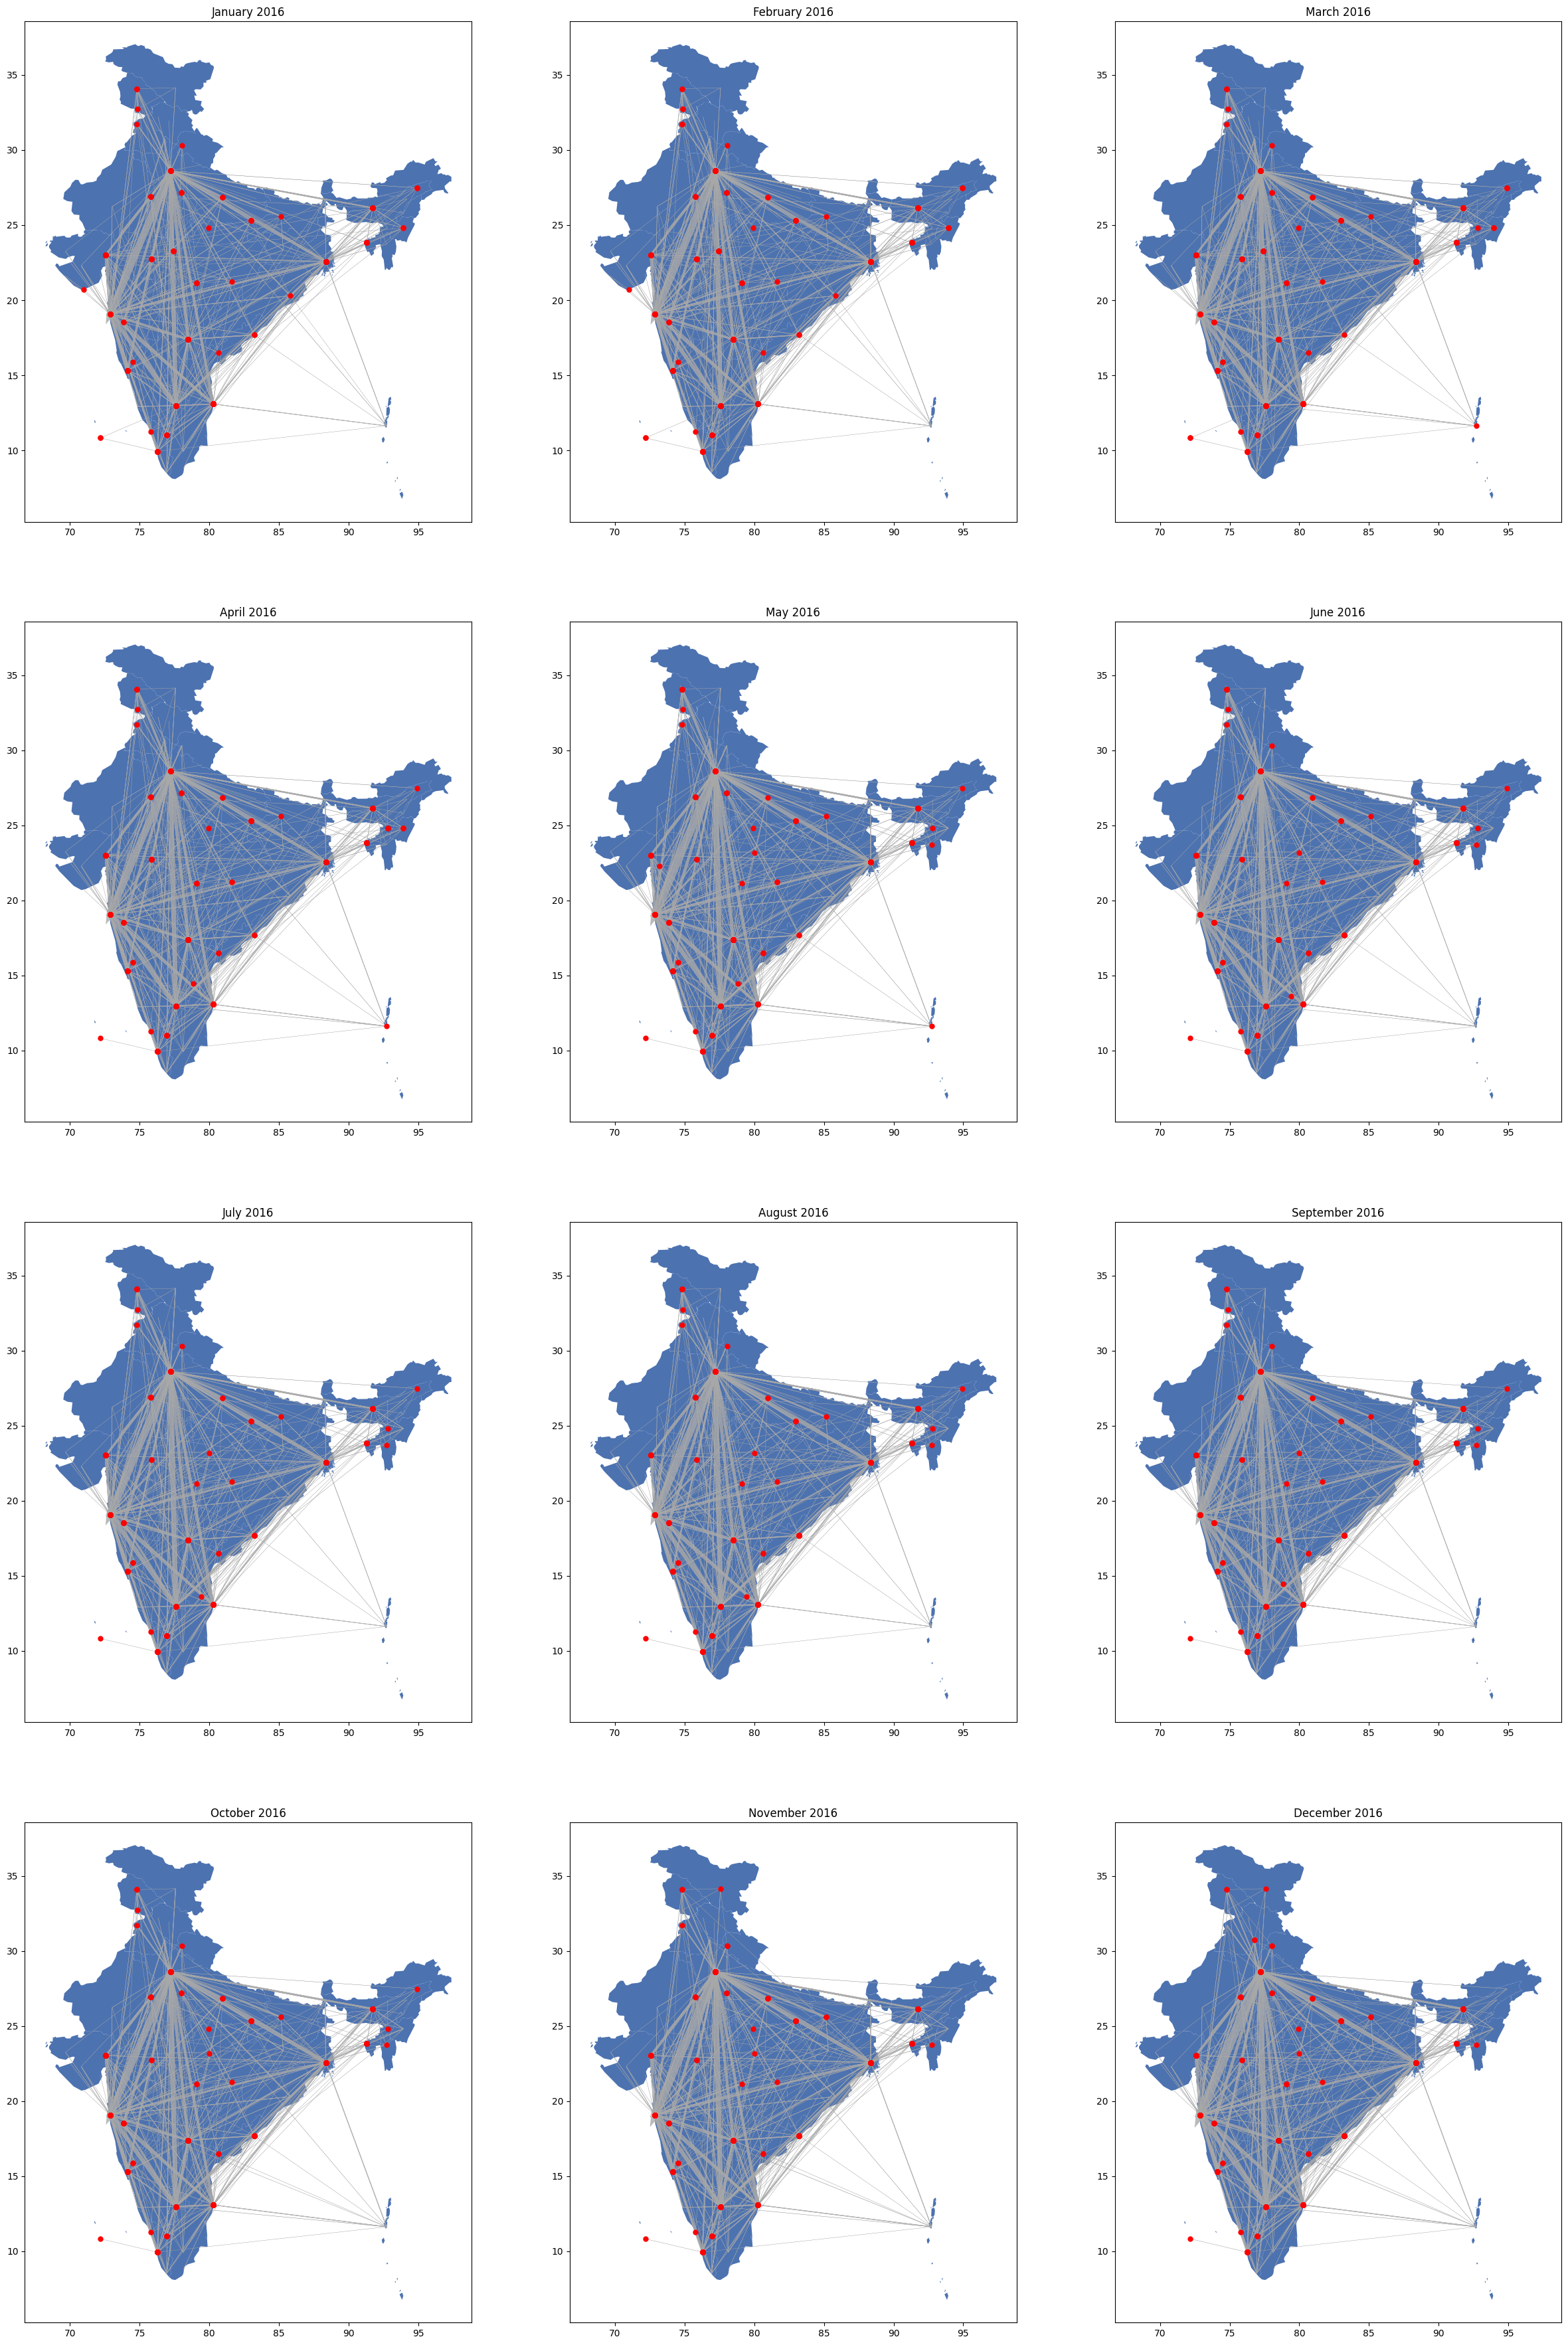

In [39]:
# Plot all the graphs from 2016 to 2023 in 3 plots per row. 
min_thickness, max_thickness = 0.2, 100
min_weight = 0
max_weight = max_passengers

numberOfYears = 1
fig, ax = plt.subplots(4*numberOfYears, 3, figsize=(30, 45))
for i, (G, name) in enumerate(zip(month_networks[:12*numberOfYears], month_network_names[:12*numberOfYears])):
    india.plot(ax=ax[i//3][i%3])
    for u, v, passengersToCity2 in G.edges(data=True):
        ax[i//3][i%3].plot(places_coordinates[u][1], places_coordinates[u][0], 'ro', markersize=5)
        start = places_coordinates[u]
        end = places_coordinates[v]
        weight = passengersToCity2['PASSENGERS TO CITY 2']
        thickness = min_thickness + ((weight - min_weight)/(max_weight-min_weight))*max_thickness
        ax[i//3][i%3].arrow(start[1],  start[0], end[1]-start[1], end[0]-start[0], alpha=0.8, linewidth= thickness, length_includes_head=True, fc='black', ec='darkgray')
        ax[i//3][i%3].set_title(name)

In [ ]:
# plt.figure(figsize=(10,10),dpi=300)
# nx.draw_networkx(G1, with_labels = False , pos = dict_pos,alpha = 0.8, node_size =node_size , node_color= node_size, edge_color='grey')
# sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(degree_val), vmax=max(degree_val)))
# sm._A = []  # Create an empty array for the colorbar
# cbar = plt.colorbar(sm, orientation='horizontal', pad=0.03)  # Set colorbar orientation to horizontal and adjust pad
# cbar.set_label('Node Degree',fontsize=16,fontweight='bold')
# plt.title("Indian Rail Network",fontsize=16,fontweight='bold')
# plt.show()

In [ ]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

i = 0
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for network, name in zip(month_networks, month_network_names):
    degrees = [network.degree(n) for n in network.nodes()]
    ax[i].hist(degrees)
    ax[i].set_title(name);
    if(i == 3):
        i = 0
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    else:
        i += 1